In [ ]:
# Jingcheng Shao 1006887219

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Set a seed for reproducibility
np.random.seed(42)

true_theta_A = 0.1
true_theta_B = 0.5
true_theta_C = 0.9

alpha_prior = 1
beta_prior = 1

posterior_params = {
    "A": (alpha_prior, beta_prior),
    "B": (alpha_prior, beta_prior),
    "C": (alpha_prior, beta_prior)
}

iterations = 100
success_rates = {
    "A": true_theta_A,
    "B": true_theta_B,
    "C": true_theta_C
}

posterior_means = {
    "A": [],
    "B": [],
    "C": []
}

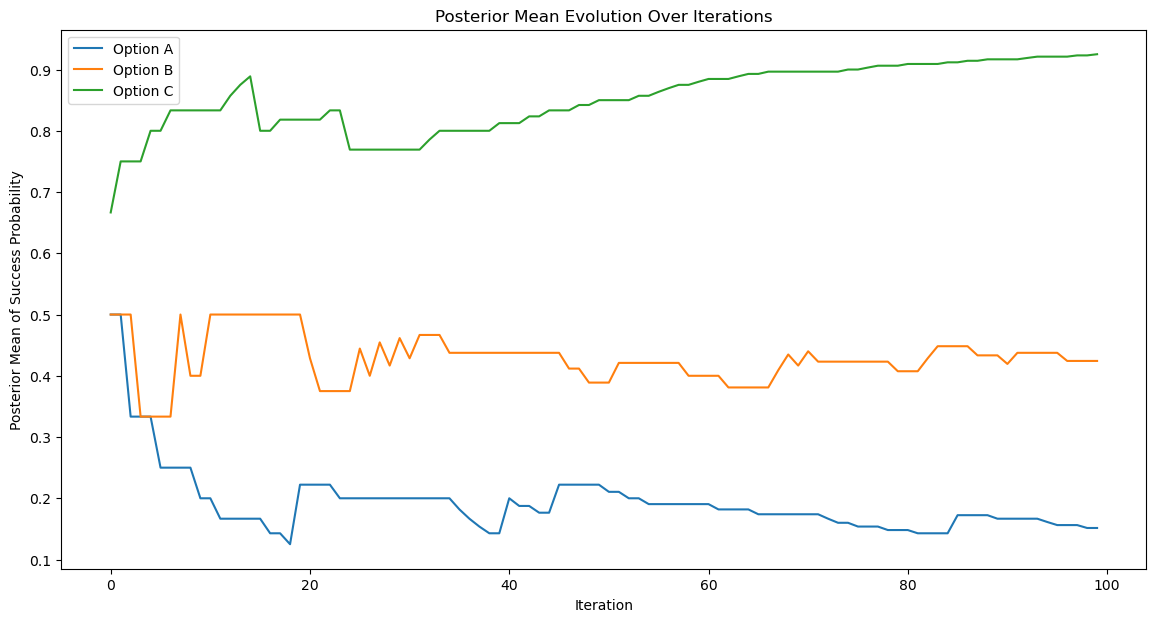

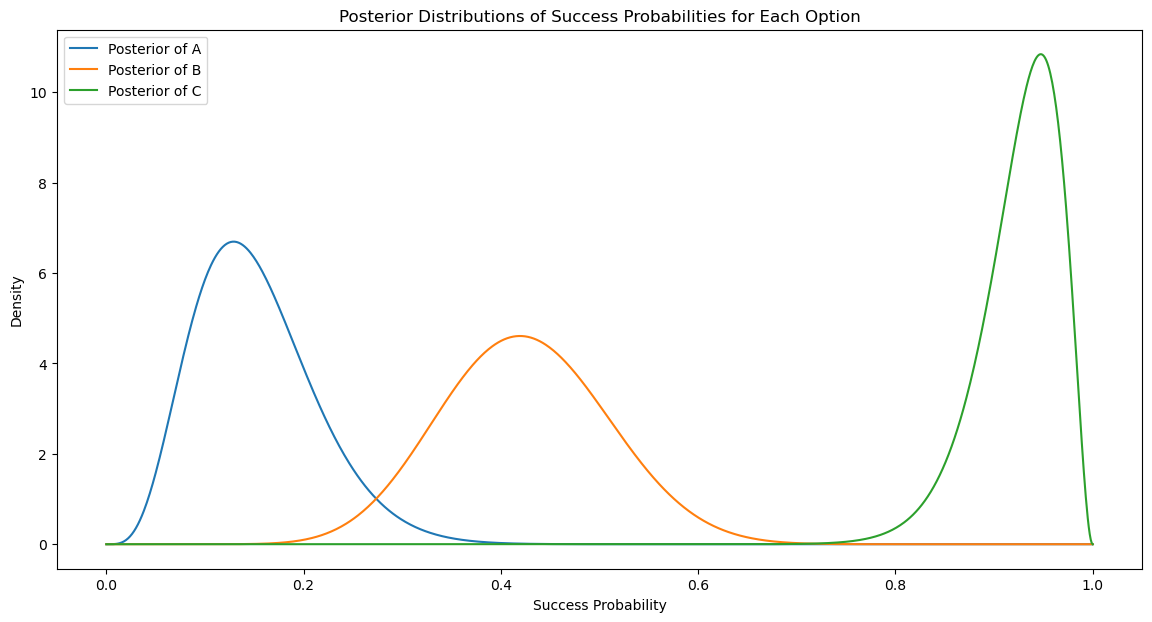

In [30]:
for i in range(iterations):
    
    choice = np.random.choice(["A", "B", "C"])
    
    success = np.random.binomial(1, success_rates[choice])
    
    alpha_update, beta_update = posterior_params[choice]
    alpha_update += success
    beta_update += 1 - success
    posterior_params[choice] = (alpha_update, beta_update)
    
    for option in ["A", "B", "C"]:
        alpha, beta = posterior_params[option]
        posterior_means[option].append(alpha / (alpha + beta))

plt.figure(figsize=(14, 7))
for option, means in posterior_means.items():
    plt.plot(means, label=f"Option {option}")

plt.xlabel("Iteration")
plt.ylabel("Posterior Mean of Success Probability")
plt.title("Posterior Mean Evolution Over Iterations")
plt.legend()
plt.show()


final_posterior_means = {option: means[-1] for option, means in posterior_means.items()}
best_choice = max(final_posterior_means, key=final_posterior_means.get)
best_choice, final_posterior_means[best_choice]

from scipy.stats import beta as beta_distribution

# Plot the posterior distributions for each option
plt.figure(figsize=(14, 7))
x = np.linspace(0, 1, 1000)  # Range of success probabilities to plot
for option, (alpha, beta) in posterior_params.items():
    # Plot the beta distribution for the updated alpha and beta parameters
    plt.plot(x, beta_distribution.pdf(x, alpha, beta), label=f'Posterior of {option}')


plt.title('Posterior Distributions of Success Probabilities for Each Option')
plt.xlabel('Success Probability')
plt.ylabel('Density')
plt.legend()
plt.show()

In [31]:
# Which one of the three choices will you try out? How will you choose?

# Based on the simulation results, I would try out option "C". 
# This decision is informed by the iterative Bayesian updating process, 
# which has indicated that option "C" has the highest posterior mean probability of success. 
# The posterior mean serves as an estimate of the true success probability, 
# and after multiple iterations of updating our beliefs with simulated trial results, 
# option "C" has consistently shown to be the most promising among the three choices.

# The choice of which option to try out is made using a Bayesian sequential learning approach. 
# At each iteration, I randomly select one of the options to simulate a trial, observe the outcome, 
# and then update the posterior distribution for the selected option based on the result. 
# This updating process involves adjusting the alpha and beta parameters of the Beta distribution that 
# represents our belief about the success probability of each option. 
# Over time, as more data is accumulated through these simulated trials, 
# the posterior distributions become more peaked around the true success rates, 
# allowing for a more informed decision on which option to select. 
# The option with the highest posterior mean after the last iteration is chosen 
# as it represents the highest estimated probability of success according to our updated beliefs.

# Other than the first plot, the Beta distribution graph for option "C" shows a more peaked and right-shifted curve compared to options "A" 
# and "B", indicating not only a higher level of confidence in its success probability but also suggesting that 
# this probability is comparatively higher. The peakedness and position of option "C"'s distribution graphically 
# reinforce our decision to choose it as the option with the highest estimated probability of success.